In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import os

import lightgbm as lgbm

from LGBMSelGB import LGBMSelGB
from utils import compare_model_error, load_data

In [3]:
base_dir = os.path.dirname(os.getcwd())
datasets_dir = os.path.join(base_dir, 'datasets')
if 'istella-short' in os.listdir(datasets_dir):
    tmp = os.path.join(datasets_dir, 'istella-short\sample')
    train_file = os.path.join(tmp, "train.txt")
    valid_file = os.path.join(tmp, "vali.txt")
    test_file = os.path.join(tmp, "test.txt")
else:
    tmp = os.path.join(datasets_dir, 'istella-s-letor\sample')
    train_file = os.path.join(tmp, "train.txt")
    valid_file = os.path.join(tmp, "vali.txt")
    test_file = os.path.join(tmp, "test.txt")
output_dir = os.path.join(base_dir, 'output')
models_dir = os.path.join(output_dir, 'models')
results_dir = os.path.join(output_dir, 'results')

In [4]:
train_data, train_labels, train_query_lens = load_data(train_file)
print('Training set loaded')

Training set loaded


In [5]:
valid_data, valid_labels, valid_query_lens = load_data(valid_file)
print('Validation set loaded')

Validation set loaded


In [6]:
test_data, test_labels, test_query_lens = load_data(test_file)
print('Testing set loaded')

Testing set loaded


In [7]:
train_set = lgbm.Dataset(train_data, label=train_labels, group=train_query_lens).construct()
eval_set = [(train_data, train_labels),
            (valid_data, valid_labels),
            (test_data, test_labels)]
eval_group = [train_query_lens, valid_query_lens, test_query_lens]
eval_names = ['train', 'valid', 'test']
valid_sets = []
for i, eval_data in enumerate(eval_set):
    ds = lgbm.Dataset(eval_data[0], eval_data[1], group=eval_group[i], reference=train_set).construct()
    valid_sets.append(ds)

In [8]:
params = {
    'objective': 'lambdarank',
    'max_position': 10,
    'learning_rate': 0.05,
    'num_leaves': 64,
    'metric': ['ndcg'],
    'ndcg_eval_at': 10,
    'verbosity': 1,
}
lgbm_base_info = {}
lgbm_base = lgbm.train(params, train_set, num_boost_round=200,
                       valid_sets=valid_sets, valid_names=eval_names,
                       verbose_eval=10, evals_result=lgbm_base_info)
lgbm_base.save_model(os.path.join(models_dir, 'lgbm_base.txt'))

[10]	train's ndcg@10: 0.702987	valid's ndcg@10: 0.680861	test's ndcg@10: 0.681516
[20]	train's ndcg@10: 0.716904	valid's ndcg@10: 0.693704	test's ndcg@10: 0.694167
[30]	train's ndcg@10: 0.727138	valid's ndcg@10: 0.703243	test's ndcg@10: 0.704513
[40]	train's ndcg@10: 0.734827	valid's ndcg@10: 0.709803	test's ndcg@10: 0.711997
[50]	train's ndcg@10: 0.740223	valid's ndcg@10: 0.715886	test's ndcg@10: 0.716419
[60]	train's ndcg@10: 0.744981	valid's ndcg@10: 0.720335	test's ndcg@10: 0.720611
[70]	train's ndcg@10: 0.748952	valid's ndcg@10: 0.724191	test's ndcg@10: 0.723476
[80]	train's ndcg@10: 0.752586	valid's ndcg@10: 0.727118	test's ndcg@10: 0.726585
[90]	train's ndcg@10: 0.756058	valid's ndcg@10: 0.730427	test's ndcg@10: 0.729646
[100]	train's ndcg@10: 0.759096	valid's ndcg@10: 0.733414	test's ndcg@10: 0.73233
[110]	train's ndcg@10: 0.762128	valid's ndcg@10: 0.735689	test's ndcg@10: 0.734366
[120]	train's ndcg@10: 0.764537	valid's ndcg@10: 0.737573	test's ndcg@10: 0.736095
[130]	train's 

In [9]:
params['boosting'] = 'goss'
lgbm_goss_info = {}
lgbm_goss = lgbm.train(params, train_set, num_boost_round=200,
                      valid_sets=valid_sets, valid_names=eval_names,
                      verbose_eval=10, evals_result=lgbm_goss_info)
lgbm_goss.save_model(os.path.join(models_dir, 'lgbm_goss.txt'))
del params['boosting']

[10]	train's ndcg@10: 0.702987	valid's ndcg@10: 0.680861	test's ndcg@10: 0.681516
[20]	train's ndcg@10: 0.716904	valid's ndcg@10: 0.693704	test's ndcg@10: 0.694167
[30]	train's ndcg@10: 0.727281	valid's ndcg@10: 0.703502	test's ndcg@10: 0.70439
[40]	train's ndcg@10: 0.734471	valid's ndcg@10: 0.709873	test's ndcg@10: 0.711512
[50]	train's ndcg@10: 0.740272	valid's ndcg@10: 0.715385	test's ndcg@10: 0.71624
[60]	train's ndcg@10: 0.744622	valid's ndcg@10: 0.719573	test's ndcg@10: 0.719833
[70]	train's ndcg@10: 0.748868	valid's ndcg@10: 0.723319	test's ndcg@10: 0.72298
[80]	train's ndcg@10: 0.752318	valid's ndcg@10: 0.726792	test's ndcg@10: 0.725587
[90]	train's ndcg@10: 0.755919	valid's ndcg@10: 0.730617	test's ndcg@10: 0.728388
[100]	train's ndcg@10: 0.759016	valid's ndcg@10: 0.732742	test's ndcg@10: 0.731931
[110]	train's ndcg@10: 0.761987	valid's ndcg@10: 0.73555	test's ndcg@10: 0.734232
[120]	train's ndcg@10: 0.764568	valid's ndcg@10: 0.737557	test's ndcg@10: 0.736442
[130]	train's ndc

In [10]:
selgb_base = LGBMSelGB(n_estimators=200, n_iter_sample=10, p=0.1, method='fixed')
selgb_base.fit(train_data, train_labels, train_query_lens, params,
           eval_set=eval_set, eval_group=eval_group, eval_names=eval_names,
           verbose=10)
selgb_base.save_model(os.path.join(models_dir, 'selgb_base.txt'))

[10]	train's ndcg@10: 0.702987	valid's ndcg@10: 0.680861	test's ndcg@10: 0.681516
[SelGB] [Info] new p: 0.1
SelGB sample execution took 1.66 min
[20]	train's ndcg@10: 0.728616	valid's ndcg@10: 0.703018	test's ndcg@10: 0.703212
[SelGB] [Info] new p: 0.1
SelGB sample execution took 1.77 min
[30]	train's ndcg@10: 0.739771	valid's ndcg@10: 0.713116	test's ndcg@10: 0.713709
[SelGB] [Info] new p: 0.1
SelGB sample execution took 1.83 min
[40]	train's ndcg@10: 0.747248	valid's ndcg@10: 0.719283	test's ndcg@10: 0.719691
[SelGB] [Info] new p: 0.1
SelGB sample execution took 1.78 min
[50]	train's ndcg@10: 0.754281	valid's ndcg@10: 0.726036	test's ndcg@10: 0.726511
[SelGB] [Info] new p: 0.1
SelGB sample execution took 1.87 min
[60]	train's ndcg@10: 0.759062	valid's ndcg@10: 0.730702	test's ndcg@10: 0.730016
[SelGB] [Info] new p: 0.1
SelGB sample execution took 1.83 min
[70]	train's ndcg@10: 0.763231	valid's ndcg@10: 0.734847	test's ndcg@10: 0.733526
[SelGB] [Info] new p: 0.1
SelGB sample execution

In [63]:
selgb_fp = LGBMSelGB(n_estimators=200, n_iter_sample=10, method='wrong_neg')
selgb_fp.fit(train_data, train_labels, train_query_lens, params,
               eval_set=eval_set, eval_group=eval_group, eval_names=eval_names,
               verbose=10)
selgb_fp.save_model(os.path.join(models_dir, 'selgb_fp.txt'))

[10]	train's ndcg@10: 0.702987	valid's ndcg@10: 0.680861	test's ndcg@10: 0.681516
[SelGB] [Info] new p: 0.10666666666666667
SelGB sample execution took 1.86 min
[20]	train's ndcg@10: 0.727456	valid's ndcg@10: 0.700926	test's ndcg@10: 0.701897
[SelGB] [Info] new p: 0.04
SelGB sample execution took 2.08 min
[30]	train's ndcg@10: 0.738248	valid's ndcg@10: 0.707739	test's ndcg@10: 0.709739
[SelGB] [Info] new p: 0.013333333333333334
SelGB sample execution took 2.01 min
[40]	train's ndcg@10: 0.745645	valid's ndcg@10: 0.714082	test's ndcg@10: 0.71553
[SelGB] [Info] new p: 0.0
SelGB sample execution took 2.14 min
[50]	train's ndcg@10: 0.752086	valid's ndcg@10: 0.718677	test's ndcg@10: 0.719839
[SelGB] [Info] new p: 0.0
SelGB sample execution took 2.08 min
[60]	train's ndcg@10: 0.75695	valid's ndcg@10: 0.722287	test's ndcg@10: 0.722736
[SelGB] [Info] new p: 0.0
SelGB sample execution took 1.99 min
[70]	train's ndcg@10: 0.76187	valid's ndcg@10: 0.725166	test's ndcg@10: 0.725157
[SelGB] [Info] ne

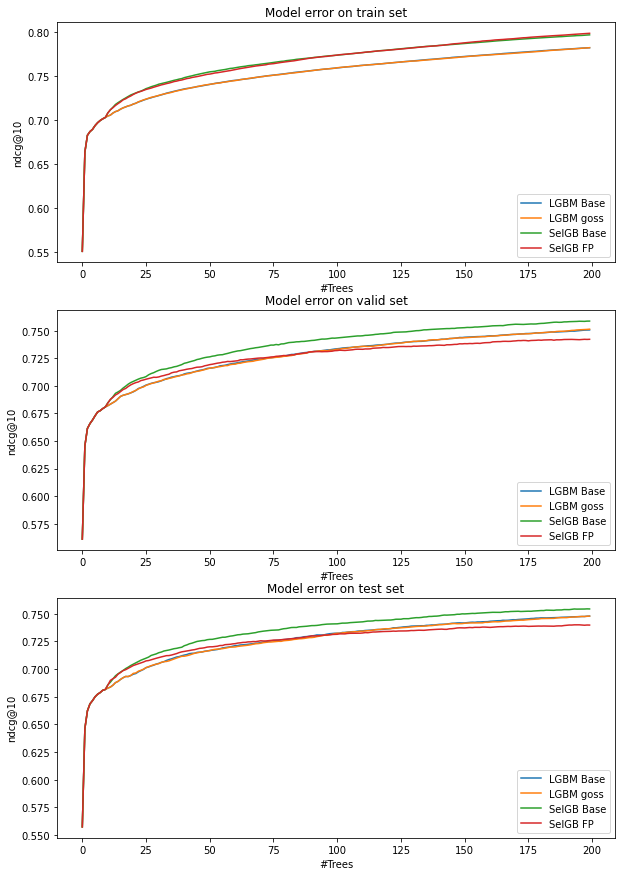

In [67]:
ndcg_150, ndcg_full = compare_model_error([lgbm_base_info, lgbm_goss_info, selgb_base.get_eval_result(), selgb_wng_neg.get_eval_result()],
                                          ['LGBM Base', 'LGBM goss', 'SelGB Base', 'SelGB FP'], plot=True)

In [68]:
ndcg_150.to_csv(os.path.join(results_dir, 'ndcg150.csv'))
ndcg_150

,train,valid,test
LGBM Base,0.772401,0.744088,0.741686
LGBM goss,0.772114,0.743657,0.741378
SelGB Base,0.787179,0.752772,0.749808
SelGB FP,0.787916,0.738287,0.737157


In [69]:
ndcg_full.to_csv(os.path.join(results_dir, 'ndcgfull.csv'))
ndcg_full

,train,valid,test
LGBM Base,0.782333,0.750697,0.747835
LGBM goss,0.782408,0.751401,0.747833
SelGB Base,0.796986,0.758734,0.754292
SelGB FP,0.798763,0.742223,0.739728
